# Sensor current histogram for all sensors!

In [1]:
from rhapi import RhApi
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
url = "http://dbloader-tracker:8113"

In [3]:
rh = RhApi(url, debug = True)

RhApi:url = http://dbloader-tracker:8113/


Query to select all current info for sensors

In [5]:
qid = rh.qid("select c.CURRNT_NAMP from trker_int2r.c1020 c where c.CURRNT_NAMP >= 0")
qid

RhApi:http://dbloader-tracker:8113/query?with payload"select c.CURRNT_NAMP from trker_int2r.c1020 c where c.CURRNT_NAMP >= 0"and headersNone
RhApi:Response200text/plain; charset=UTF-8


'o177865c6619'

You can not select that many rows at once\
Lets make sure

In [7]:
rh.data(qid)

RhApi:http://dbloader-tracker:8113/query/o177865c6619?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6619/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8


RhApiRowLimitError: Rows count (6000) is larger than rows limit (1000) for a single result

But special histo function will prepare a histogram bins info right in the database!

In [8]:
histo = rh.histo(qid, 'CURRNT_NAMP', 20)
histo = np.array(histo['bins'])
histo

RhApi:http://dbloader-tracker:8113/query/o177865c6619/histo/CURRNT_NAMP/20?with payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8


array([[0, None, None, 0, 0],
       [1, 44.3275, 0, 88.655, 1365],
       [2, 132.9825, 88.655, 177.31, 1763],
       [3, 221.6375, 177.31, 265.965, 1002],
       [4, 310.2925, 265.965, 354.62, 539],
       [5, 398.9475, 354.62, 443.275, 458],
       [6, 487.6025, 443.275, 531.93, 188],
       [7, 576.2575, 531.93, 620.585, 121],
       [8, 664.9125, 620.585, 709.24, 98],
       [9, 753.5675, 709.24, 797.895, 84],
       [10, 842.2225, 797.895, 886.55, 80],
       [11, 930.8775, 886.55, 975.205, 68],
       [12, 1019.5325, 975.205, 1063.86, 66],
       [13, 1108.1875, 1063.86, 1152.515, 62],
       [14, 1196.8425, 1152.515, 1241.17, 58],
       [15, 1285.4975, 1241.17, 1329.825, 25],
       [16, 1374.1525, 1329.825, 1418.48, 9],
       [17, 1462.8075, 1418.48, 1507.135, 8],
       [18, 1551.4625, 1507.135, 1595.79, 2],
       [19, 1640.1175, 1595.79, 1684.445, 2],
       [20, 1728.7725, 1684.445, 1773.1, 1],
       [21, None, 1773.1, None, 1]], dtype=object)

And lets draw it!

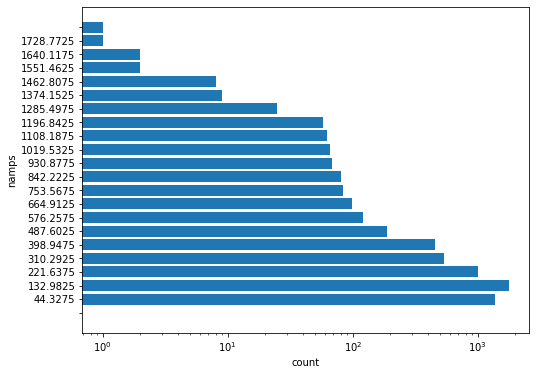

In [9]:
fig = plt.figure(figsize=(8, 6))
plt.barh(histo[:,0], histo[:,4], tick_label = histo[:,1], log = True)
plt.xlabel("count")
plt.ylabel("namps")
plt.show(fig)